In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [4]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


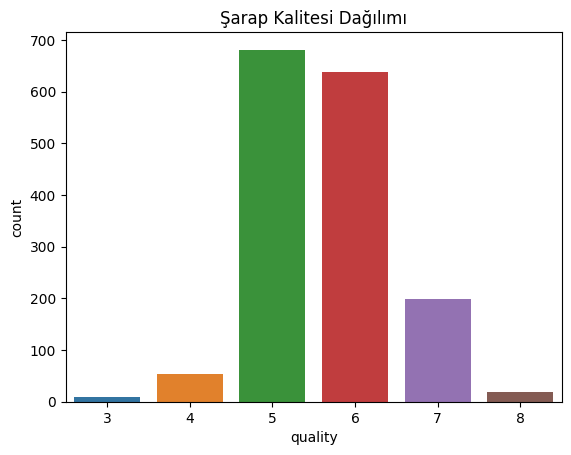

In [7]:
sns.countplot(x='quality', data=df)
plt.title("Şarap Kalitesi Dağılımı")
plt.show()

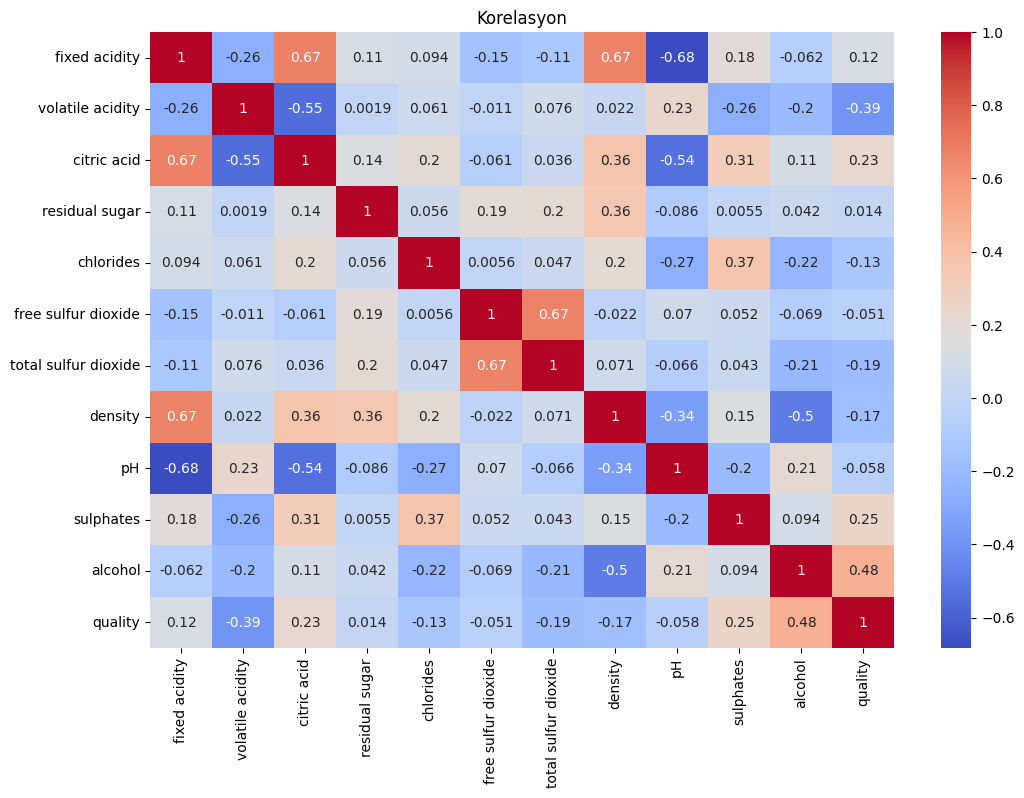

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon")
plt.show()

In [9]:
correlation_with_quality = df.corr(numeric_only=True)["quality"].sort_values(ascending=False)

print("korelasyonu en yüksekten düşüğe:")
print(correlation_with_quality)

korelasyonu en yüksekten düşüğe:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [10]:
df.loc[:, 'quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop('quality', axis=1)
y = df['quality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression:**

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

Dogruluk: 86.56%
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



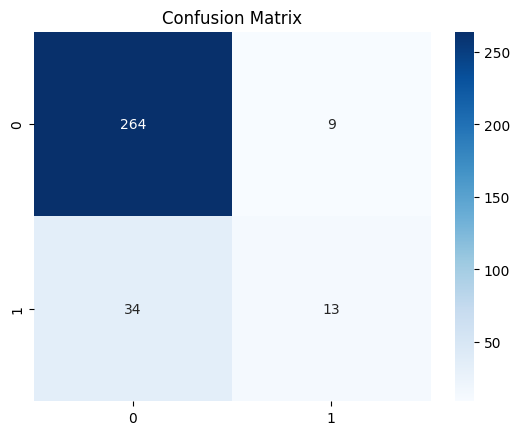

In [14]:


accuracy = accuracy_score(y_test, y_pred_log)
print(f"Dogruluk: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# **Decision Tree:**

In [15]:
dt = DecisionTreeClassifier(random_state=31)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [16]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Doğruluk:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

Decision Tree Doğruluk: 0.8875
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.62      0.62      0.62        47

    accuracy                           0.89       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.89      0.89      0.89       320



# **Random Forest:**

In [17]:
rf = RandomForestClassifier(random_state=31)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [18]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Doğruluk:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Doğruluk: 0.903125
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.71      0.57      0.64        47

    accuracy                           0.90       320
   macro avg       0.82      0.77      0.79       320
weighted avg       0.90      0.90      0.90       320



# **GridSearchCV**

In [19]:
# Yeni model ismi: rf_grid
rf_grid = RandomForestClassifier(random_state=31)

# Parametre kombinasyonları
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
}

In [20]:
grid_search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid,cv=3, n_jobs=-1, scoring='accuracy') 
grid_search_rf.fit(X_train, y_train)

# En iyi sonucu yazdır
print("En iyi parametreler:", grid_search_rf.best_params_)
print("En iyi doğruluk (CV sonucu):", grid_search_rf.best_score_)


En iyi parametreler: {'max_depth': None, 'n_estimators': 50}
En iyi doğruluk (CV sonucu): 0.9053977782908745


In [21]:
# Test seti ile performansı değerlendirelim
best_rf_grid = grid_search_rf.best_estimator_

y_pred_grid = best_rf_grid.predict(X_test)
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

Test Seti Doğruluk: 0.9
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.70      0.55      0.62        47

    accuracy                           0.90       320
   macro avg       0.81      0.76      0.78       320
weighted avg       0.89      0.90      0.89       320

